Taken from website:-
https://ourworldindata.org/coronavirus-source-data

Import libraries

In [365]:
import pandas as pd
import numpy as np

Read files

In [366]:
# load datasets
train = pd.read_csv('/content/drive/MyDrive/owid-covid-data.csv')
train

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56841,ZWE,Africa,Zimbabwe,2020-12-24,12786.0,130.0,131.429,339.0,9.0,3.571,860.261,8.747,8.843,22.808,0.606,0.240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1870.0,204892.0,13.785,0.126,1697.0,0.114,0.077,12.9,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56842,ZWE,Africa,Zimbabwe,2020-12-25,12880.0,94.0,119.000,341.0,2.0,3.571,866.586,6.324,8.006,22.943,0.135,0.240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1700.0,206592.0,13.900,0.114,1632.0,0.110,0.073,13.7,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56843,ZWE,Africa,Zimbabwe,2020-12-26,12963.0,83.0,116.000,341.0,0.0,3.286,872.170,5.584,7.805,22.943,0.000,0.221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1184.0,207776.0,13.979,0.080,1576.0,0.106,0.074,13.6,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56844,ZWE,Africa,Zimbabwe,2020-12-27,13077.0,114.0,107.429,349.0,8.0,4.143,879.840,7.670,7.228,23.481,0.538,0.279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1015.0,208791.0,14.048,0.068,1414.0,0.095,0.076,13.2,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [367]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56846 entries, 0 to 56845
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            56520 non-null  object 
 1   continent                           56178 non-null  object 
 2   location                            56846 non-null  object 
 3   date                                56846 non-null  object 
 4   total_cases                         56289 non-null  float64
 5   new_cases                           56283 non-null  float64
 6   new_cases_smoothed                  55327 non-null  float64
 7   total_deaths                        48064 non-null  float64
 8   new_deaths                          48063 non-null  float64
 9   new_deaths_smoothed                 55327 non-null  float64
 10  total_cases_per_million             55963 non-null  float64
 11  new_cases_per_million               55957

In [368]:
country = "United Kingdom"

include_uk = train[train['location'].values == country]
exclude_uk = train[train['location'].values != country]
include_uk

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
53438,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.029,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53439,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53440,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53441,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,0.118,0.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53442,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,0.118,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53766,GBR,Europe,United Kingdom,2020-12-24,2195144.0,39148.0,34410.857,69732.0,575.0,511.714,32335.737,576.673,506.892,1027.193,8.470,7.538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800000.0,1.18,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53767,GBR,Europe,United Kingdom,2020-12-25,2227947.0,32803.0,35017.000,70302.0,570.0,523.143,32818.945,483.207,515.821,1035.589,8.396,7.706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53768,GBR,Europe,United Kingdom,2020-12-26,2262735.0,34788.0,36094.000,70513.0,211.0,476.571,33331.392,512.447,531.685,1038.697,3.108,7.020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53769,GBR,Europe,United Kingdom,2020-12-27,2295228.0,32493.0,35581.000,70860.0,347.0,479.571,33810.032,478.641,524.129,1043.809,5.112,7.064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922


In [369]:
uk_newdeath = pd.DataFrame({'date':include_uk.date , 'new_cases': include_uk.new_cases, 'new_deaths': include_uk.new_deaths}).reset_index()
uk_newdeath

,index,date,new_cases,new_deaths
0,53438,2020-01-31,2.0,NaN
1,53439,2020-02-01,0.0,NaN
2,53440,2020-02-02,0.0,NaN
3,53441,2020-02-03,6.0,NaN
4,53442,2020-02-04,0.0,NaN
...,...,...,...,...
328,53766,2020-12-24,39148.0,575.0
329,53767,2020-12-25,32803.0,570.0
330,53768,2020-12-26,34788.0,211.0
331,53769,2020-12-27,32493.0,347.0


Rename columns

In [370]:
uk_newdeath.rename(columns={'date':'ds', 'new_cases': 'add1', 'new_deaths': 'y'}, inplace=True)
uk_newdeath

,index,ds,add1,y
0,53438,2020-01-31,2.0,NaN
1,53439,2020-02-01,0.0,NaN
2,53440,2020-02-02,0.0,NaN
3,53441,2020-02-03,6.0,NaN
4,53442,2020-02-04,0.0,NaN
...,...,...,...,...
328,53766,2020-12-24,39148.0,575.0
329,53767,2020-12-25,32803.0,570.0
330,53768,2020-12-26,34788.0,211.0
331,53769,2020-12-27,32493.0,347.0


Graph time series

Text(0, 0.5, 'y')

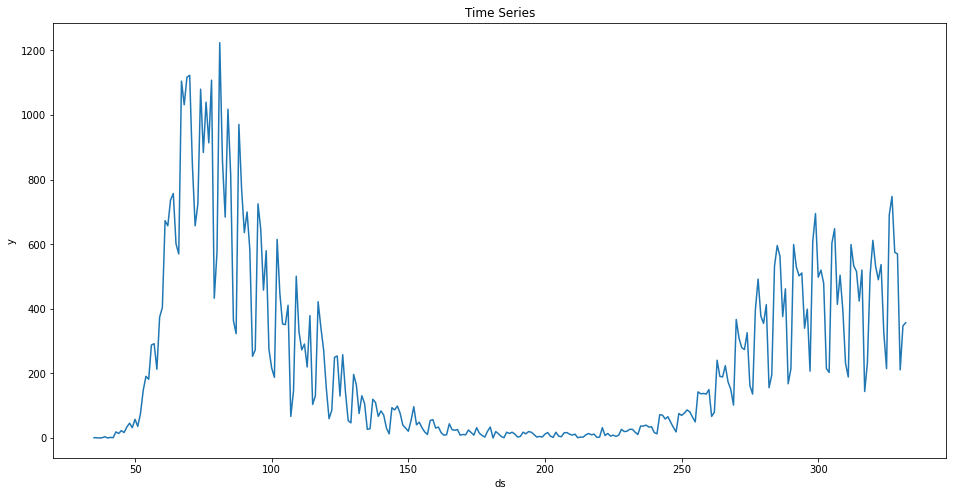

In [371]:
import matplotlib.pyplot as plt

uk_newdeath['y'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("ds") 
plt.ylabel("y")

Split time series

In [372]:
month = '2021-01'

test = pd.DataFrame({
    'date': pd.date_range(
        start = pd.Timestamp(month),                        
        end = pd.Timestamp(month) + pd.offsets.MonthEnd(0),
        freq = 'D'
    )
})
test

,date
0,2021-01-01
1,2021-01-02
2,2021-01-03
3,2021-01-04
4,2021-01-05
5,2021-01-06
6,2021-01-07
7,2021-01-08
8,2021-01-09
9,2021-01-10


In [373]:
test['new_case'] = uk_newdeath.add1.max()
test

,date,new_case
0,2021-01-01,41460.0
1,2021-01-02,41460.0
2,2021-01-03,41460.0
3,2021-01-04,41460.0
4,2021-01-05,41460.0
5,2021-01-06,41460.0
6,2021-01-07,41460.0
7,2021-01-08,41460.0
8,2021-01-09,41460.0
9,2021-01-10,41460.0


In [374]:
test.rename(columns={'date':'ds', 'new_case': 'add1'}, inplace=True)
test

,ds,add1
0,2021-01-01,41460.0
1,2021-01-02,41460.0
2,2021-01-03,41460.0
3,2021-01-04,41460.0
4,2021-01-05,41460.0
5,2021-01-06,41460.0
6,2021-01-07,41460.0
7,2021-01-08,41460.0
8,2021-01-09,41460.0
9,2021-01-10,41460.0


In [375]:
X_train = uk_newdeath.loc[uk_newdeath["ds"]<"2020-12-01"]
X_val  = uk_newdeath.loc[uk_newdeath["ds"]>="2020-12-01"]
X_test = test.loc[test["ds"]>="2021-01-01"]

FB Prophet

In [376]:
from fbprophet import Prophet

model = Prophet()
model.add_regressor('add1')
model.fit(X_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict on validation set

In [377]:
forecast = model.predict(X_val.drop(columns="y"))
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-01,-180.861372,-136.248501,374.191570,-180.861372,-180.861372,213.173875,213.173875,213.173875,290.265235,290.265235,290.265235,213.173875,213.173875,213.173875,77.091360,77.091360,77.091360,0.0,0.0,0.0,109.403863
1,2020-12-02,-183.894376,-99.620069,395.496641,-183.894376,-183.894376,291.605244,291.605244,291.605244,334.247113,334.247113,334.247113,291.605244,291.605244,291.605244,42.641869,42.641869,42.641869,0.0,0.0,0.0,150.352737
2,2020-12-03,-186.927380,-182.358050,327.157986,-186.943956,-186.901874,254.794025,254.794025,254.794025,260.891346,260.891346,260.891346,254.794025,254.794025,254.794025,6.097321,6.097321,6.097321,0.0,0.0,0.0,73.963965
3,2020-12-04,-189.960385,-120.460009,388.353059,-190.052209,-189.868017,295.755809,295.755809,295.755809,324.967979,324.967979,324.967979,295.755809,295.755809,295.755809,29.212169,29.212169,29.212169,0.0,0.0,0.0,135.007594
4,2020-12-05,-192.993389,-160.477105,346.161196,-193.163303,-192.792742,272.770266,272.770266,272.770266,275.957127,275.957127,275.957127,272.770266,272.770266,272.770266,3.186862,3.186862,3.186862,0.0,0.0,0.0,82.963739
5,2020-12-06,-196.026393,-202.958429,290.010259,-196.309369,-195.725631,324.094151,324.094151,324.094151,241.788337,241.788337,241.788337,324.094151,324.094151,324.094151,-82.305814,-82.305814,-82.305814,0.0,0.0,0.0,45.761944
6,2020-12-07,-199.059397,-274.229015,243.231564,-199.446279,-198.624938,249.727473,249.727473,249.727473,173.803705,173.803705,173.803705,249.727473,249.727473,249.727473,-75.923768,-75.923768,-75.923768,0.0,0.0,0.0,-25.255692
7,2020-12-08,-202.092401,-191.285047,321.318746,-202.626851,-201.530277,181.371958,181.371958,181.371958,258.463319,258.463319,258.463319,181.371958,181.371958,181.371958,77.091360,77.091360,77.091360,0.0,0.0,0.0,56.370917
8,2020-12-09,-205.125406,-112.977391,383.273288,-205.789833,-204.447589,302.969205,302.969205,302.969205,345.611074,345.611074,345.611074,302.969205,302.969205,302.969205,42.641869,42.641869,42.641869,0.0,0.0,0.0,140.485668
9,2020-12-10,-208.158410,-45.148075,499.851929,-208.972019,-207.318747,429.833376,429.833376,429.833376,435.930697,435.930697,435.930697,429.833376,429.833376,429.833376,6.097321,6.097321,6.097321,0.0,0.0,0.0,227.772287


In [378]:
# Calculating the RMSE of the model
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(X_val['y'], forecast['yhat'])) 
print(rms)

275.5626159211411


In [379]:
forecast.yhat[forecast.yhat < 0] = 0

df_val=pd.DataFrame({'actual': X_val.y.values, 'predicted': forecast.yhat.values.astype(int)})
df_val.reset_index(drop=True, inplace=True)
df_val

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,actual,predicted
0,603.0,109
1,648.0,150
2,414.0,73
3,504.0,135
4,397.0,82
5,231.0,45
6,189.0,0
7,599.0,56
8,533.0,140
9,516.0,227


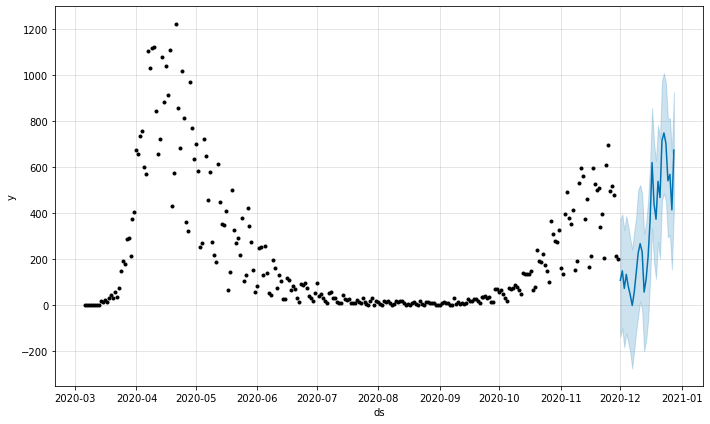

In [380]:
fig1 = model.plot(forecast)

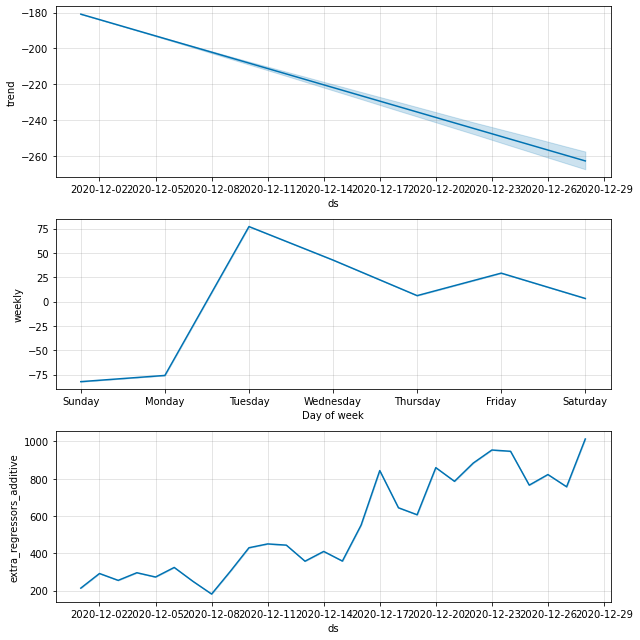

In [381]:
fig2 = model.plot_components(forecast)

In [382]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [383]:
plot_components_plotly(model, forecast)

Predict on test set

In [384]:
prediction = model.predict(X_test)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,-274.884502,492.487664,1027.069290,-280.807698,-268.041029,1013.60321,1013.60321,1013.60321,1042.815379,1042.815379,1042.815379,1013.60321,1013.60321,1013.60321,29.212169,29.212169,29.212169,0.0,0.0,0.0,767.930877
1,2021-01-02,-277.917506,485.652196,998.968952,-284.158531,-270.739427,1013.60321,1013.60321,1013.60321,1016.790072,1016.790072,1016.790072,1013.60321,1013.60321,1013.60321,3.186862,3.186862,3.186862,0.0,0.0,0.0,738.872565
2,2021-01-03,-280.950511,407.003379,901.326563,-287.472647,-273.434146,1013.60321,1013.60321,1013.60321,931.297396,931.297396,931.297396,1013.60321,1013.60321,1013.60321,-82.305814,-82.305814,-82.305814,0.0,0.0,0.0,650.346886
3,2021-01-04,-283.983515,395.497775,909.758578,-290.769358,-276.071566,1013.60321,1013.60321,1013.60321,937.679442,937.679442,937.679442,1013.60321,1013.60321,1013.60321,-75.923768,-75.923768,-75.923768,0.0,0.0,0.0,653.695927
4,2021-01-05,-287.016519,529.959328,1056.828261,-294.125018,-278.732644,1013.60321,1013.60321,1013.60321,1090.694570,1090.694570,1090.694570,1013.60321,1013.60321,1013.60321,77.091360,77.091360,77.091360,0.0,0.0,0.0,803.678051
5,2021-01-06,-290.049523,522.803998,1018.099850,-297.483415,-281.390008,1013.60321,1013.60321,1013.60321,1056.245079,1056.245079,1056.245079,1013.60321,1013.60321,1013.60321,42.641869,42.641869,42.641869,0.0,0.0,0.0,766.195556
6,2021-01-07,-293.082527,474.453176,964.411016,-300.743023,-284.028393,1013.60321,1013.60321,1013.60321,1019.700531,1019.700531,1019.700531,1013.60321,1013.60321,1013.60321,6.097321,6.097321,6.097321,0.0,0.0,0.0,726.618004
7,2021-01-08,-296.115532,471.563370,984.473809,-304.084299,-286.716733,1013.60321,1013.60321,1013.60321,1042.815379,1042.815379,1042.815379,1013.60321,1013.60321,1013.60321,29.212169,29.212169,29.212169,0.0,0.0,0.0,746.699848
8,2021-01-09,-299.148536,464.740611,985.116779,-307.444041,-289.321399,1013.60321,1013.60321,1013.60321,1016.790072,1016.790072,1016.790072,1013.60321,1013.60321,1013.60321,3.186862,3.186862,3.186862,0.0,0.0,0.0,717.641536
9,2021-01-10,-302.181540,359.676288,893.402295,-310.872427,-291.975898,1013.60321,1013.60321,1013.60321,931.297396,931.297396,931.297396,1013.60321,1013.60321,1013.60321,-82.305814,-82.305814,-82.305814,0.0,0.0,0.0,629.115856


In [385]:
prediction.yhat[prediction.yhat < 0] = 0

output = pd.DataFrame({'date': test.ds, 'new_death': prediction.yhat.values.astype(int)})
output.to_csv('p_new_death.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [386]:
#upload submission
p_new_death = pd.read_csv("p_new_death.csv")
p_new_death

,date,new_death
0,2021-01-01,767
1,2021-01-02,738
2,2021-01-03,650
3,2021-01-04,653
4,2021-01-05,803
5,2021-01-06,766
6,2021-01-07,726
7,2021-01-08,746
8,2021-01-09,717
9,2021-01-10,629


In [387]:
df_out = forecast.append(prediction)
df_out

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-01,-180.861372,-136.248501,374.191570,-180.861372,-180.861372,213.173875,213.173875,213.173875,290.265235,290.265235,290.265235,213.173875,213.173875,213.173875,77.091360,77.091360,77.091360,0.0,0.0,0.0,109.403863
1,2020-12-02,-183.894376,-99.620069,395.496641,-183.894376,-183.894376,291.605244,291.605244,291.605244,334.247113,334.247113,334.247113,291.605244,291.605244,291.605244,42.641869,42.641869,42.641869,0.0,0.0,0.0,150.352737
2,2020-12-03,-186.927380,-182.358050,327.157986,-186.943956,-186.901874,254.794025,254.794025,254.794025,260.891346,260.891346,260.891346,254.794025,254.794025,254.794025,6.097321,6.097321,6.097321,0.0,0.0,0.0,73.963965
3,2020-12-04,-189.960385,-120.460009,388.353059,-190.052209,-189.868017,295.755809,295.755809,295.755809,324.967979,324.967979,324.967979,295.755809,295.755809,295.755809,29.212169,29.212169,29.212169,0.0,0.0,0.0,135.007594
4,2020-12-05,-192.993389,-160.477105,346.161196,-193.163303,-192.792742,272.770266,272.770266,272.770266,275.957127,275.957127,275.957127,272.770266,272.770266,272.770266,3.186862,3.186862,3.186862,0.0,0.0,0.0,82.963739
5,2020-12-06,-196.026393,-202.958429,290.010259,-196.309369,-195.725631,324.094151,324.094151,324.094151,241.788337,241.788337,241.788337,324.094151,324.094151,324.094151,-82.305814,-82.305814,-82.305814,0.0,0.0,0.0,45.761944
6,2020-12-07,-199.059397,-274.229015,243.231564,-199.446279,-198.624938,249.727473,249.727473,249.727473,173.803705,173.803705,173.803705,249.727473,249.727473,249.727473,-75.923768,-75.923768,-75.923768,0.0,0.0,0.0,0.000000
7,2020-12-08,-202.092401,-191.285047,321.318746,-202.626851,-201.530277,181.371958,181.371958,181.371958,258.463319,258.463319,258.463319,181.371958,181.371958,181.371958,77.091360,77.091360,77.091360,0.0,0.0,0.0,56.370917
8,2020-12-09,-205.125406,-112.977391,383.273288,-205.789833,-204.447589,302.969205,302.969205,302.969205,345.611074,345.611074,345.611074,302.969205,302.969205,302.969205,42.641869,42.641869,42.641869,0.0,0.0,0.0,140.485668
9,2020-12-10,-208.158410,-45.148075,499.851929,-208.972019,-207.318747,429.833376,429.833376,429.833376,435.930697,435.930697,435.930697,429.833376,429.833376,429.833376,6.097321,6.097321,6.097321,0.0,0.0,0.0,227.772287


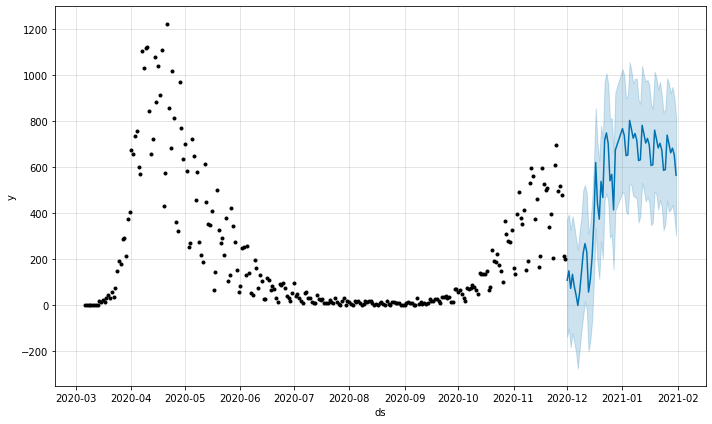

In [388]:
fig1 = model.plot(df_out)

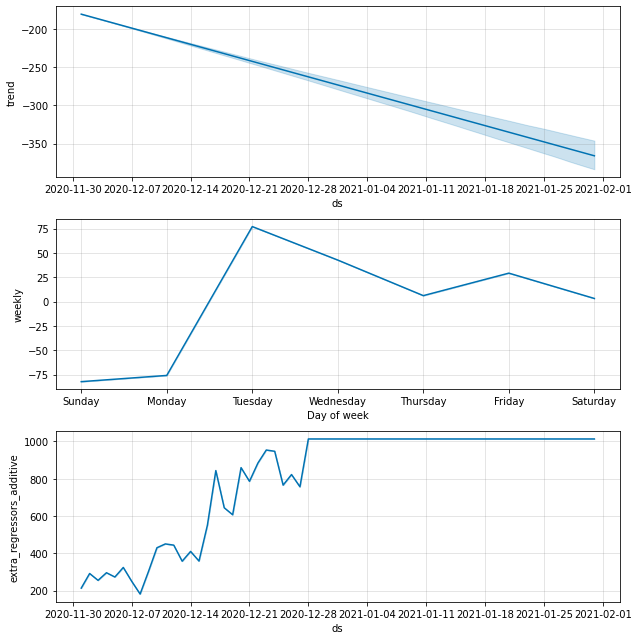

In [389]:
fig2 = model.plot_components(df_out)

In [390]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, df_out)

In [391]:
plot_components_plotly(model, df_out)

Statsmodels

Naive approach

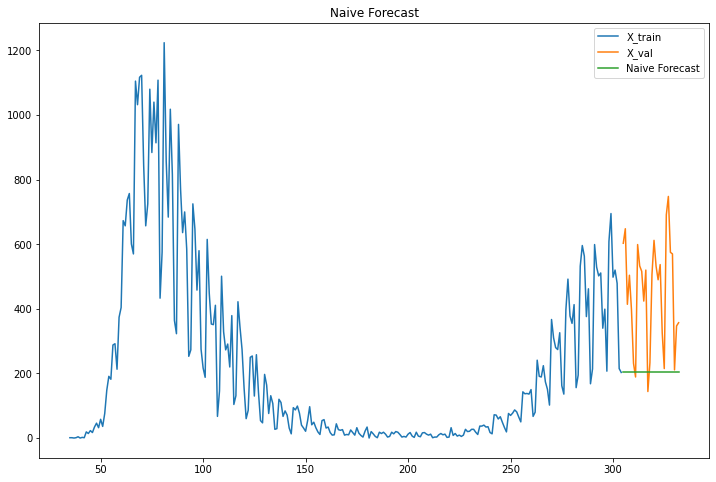

In [392]:
#naive approach
dd= np.asarray(X_train.y) 
y_hat = X_val.copy() 
y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(X_train.index, X_train['y'], label='X_train') 
plt.plot(X_val.index,X_val['y'], label='X_val') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

In [393]:
y_hat

,index,ds,add1,y,naive
305,53743,2020-12-01,13497.0,603.0,203.0
306,53744,2020-12-02,16237.0,648.0,203.0
307,53745,2020-12-03,14951.0,414.0,203.0
308,53746,2020-12-04,16382.0,504.0,203.0
309,53747,2020-12-05,15579.0,397.0,203.0
310,53748,2020-12-06,17372.0,231.0,203.0
311,53749,2020-12-07,14774.0,189.0,203.0
312,53750,2020-12-08,12386.0,599.0,203.0
313,53751,2020-12-09,16634.0,533.0,203.0
314,53752,2020-12-10,21066.0,516.0,203.0


In [394]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(X_val.y, y_hat.naive)) 
print(rms)

297.51626606192235


Moving Average

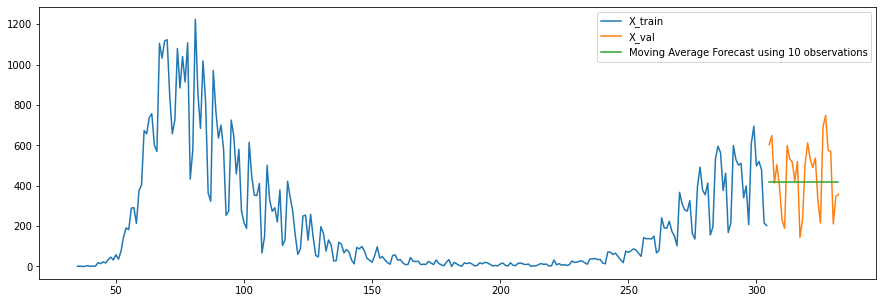

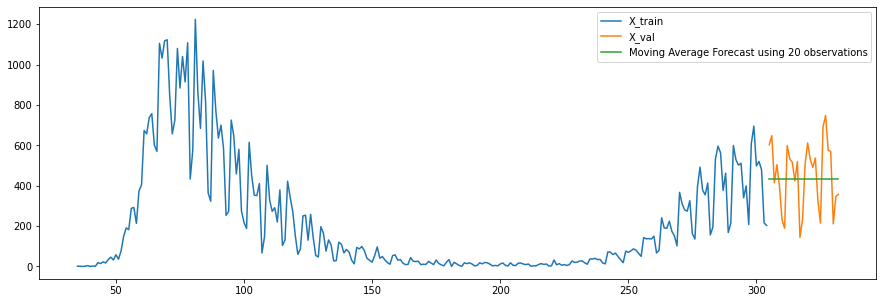

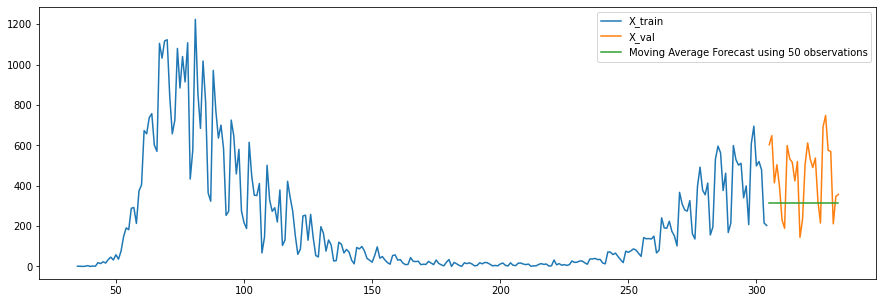

In [395]:
#moving average
# Considering rolling mean for last 10, 20, 50 days and visualize the results.
y_hat_avg = X_val.copy() 
y_hat_avg['moving_avg_forecast'] = X_train['y'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(X_train['y'], label='X_train') 
plt.plot(X_val['y'], label='X_val') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = X_val.copy() 
y_hat_avg['moving_avg_forecast'] = X_train['y'].rolling(20).mean().iloc[-1] # average of last 20 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(X_train['y'], label='X_train') 
plt.plot(X_val['y'], label='X_val') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = X_val.copy() 
y_hat_avg['moving_avg_forecast'] = X_train['y'].rolling(50).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(X_train['y'], label='X_train') 
plt.plot(X_val['y'], label='X_val') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

In [396]:
# RMSE value for Moving Average 
rms = sqrt(mean_squared_error(X_val.y, y_hat_avg.moving_avg_forecast)) 
print(rms)

214.06081245424497


In [397]:
train = X_train.append(X_val)
train

,index,ds,add1,y
0,53438,2020-01-31,2.0,NaN
1,53439,2020-02-01,0.0,NaN
2,53440,2020-02-02,0.0,NaN
3,53441,2020-02-03,6.0,NaN
4,53442,2020-02-04,0.0,NaN
...,...,...,...,...
328,53766,2020-12-24,39148.0,575.0
329,53767,2020-12-25,32803.0,570.0
330,53768,2020-12-26,34788.0,211.0
331,53769,2020-12-27,32493.0,347.0


In [398]:
#predict on X_test
y_hat_avg = X_test.copy()
y_hat_avg['moving_avg_forecast'] = train['y'].rolling(50).mean().iloc[-1] # average of last 50 observations
y_hat_avg

,ds,add1,moving_avg_forecast
0,2021-01-01,41460.0,441.66
1,2021-01-02,41460.0,441.66
2,2021-01-03,41460.0,441.66
3,2021-01-04,41460.0,441.66
4,2021-01-05,41460.0,441.66
5,2021-01-06,41460.0,441.66
6,2021-01-07,41460.0,441.66
7,2021-01-08,41460.0,441.66
8,2021-01-09,41460.0,441.66
9,2021-01-10,41460.0,441.66


In [399]:
X_val.index.max()

332

In [400]:
list_num = []
index = X_val.index.max()
for i in range(len(X_test)):
  index = index + 1
  list_num.append(index)
list_num

[333,
 334,
 335,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363]

In [401]:
X_test['index'] = list_num
X_test

,ds,add1,index
0,2021-01-01,41460.0,333
1,2021-01-02,41460.0,334
2,2021-01-03,41460.0,335
3,2021-01-04,41460.0,336
4,2021-01-05,41460.0,337
5,2021-01-06,41460.0,338
6,2021-01-07,41460.0,339
7,2021-01-08,41460.0,340
8,2021-01-09,41460.0,341
9,2021-01-10,41460.0,342


In [402]:
y_hat_avg['index'] = list_num
y_hat_avg

,ds,add1,moving_avg_forecast,index
0,2021-01-01,41460.0,441.66,333
1,2021-01-02,41460.0,441.66,334
2,2021-01-03,41460.0,441.66,335
3,2021-01-04,41460.0,441.66,336
4,2021-01-05,41460.0,441.66,337
5,2021-01-06,41460.0,441.66,338
6,2021-01-07,41460.0,441.66,339
7,2021-01-08,41460.0,441.66,340
8,2021-01-09,41460.0,441.66,341
9,2021-01-10,41460.0,441.66,342


In [403]:
y_hat_avg.set_index(['index'], inplace=True)
y_hat_avg

,ds,add1,moving_avg_forecast
index,,,
333,2021-01-01,41460.0,441.66
334,2021-01-02,41460.0,441.66
335,2021-01-03,41460.0,441.66
336,2021-01-04,41460.0,441.66
337,2021-01-05,41460.0,441.66
338,2021-01-06,41460.0,441.66
339,2021-01-07,41460.0,441.66
340,2021-01-08,41460.0,441.66
341,2021-01-09,41460.0,441.66


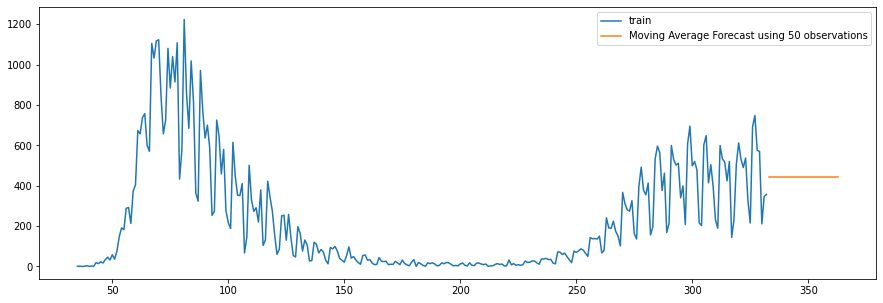

In [404]:
plt.figure(figsize=(15,5)) 
plt.plot(train['y'], label='train') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

In [405]:
#select last column from array
y_hat_avg.iloc[:,-1:] = y_hat_avg.iloc[:,-1:].astype(int)
print(y_hat_avg.iloc[:,-1:])

       moving_avg_forecast
index                     
333                    441
334                    441
335                    441
336                    441
337                    441
338                    441
339                    441
340                    441
341                    441
342                    441
343                    441
344                    441
345                    441
346                    441
347                    441
348                    441
349                    441
350                    441
351                    441
352                    441
353                    441
354                    441
355                    441
356                    441
357                    441
358                    441
359                    441
360                    441
361                    441
362                    441
363                    441


In [406]:
prediction = y_hat_avg.moving_avg_forecast

prediction[prediction < 0] = 0

output = pd.DataFrame({'date': test.ds, 'new_death': prediction.values.astype(int)})
output.to_csv('p_new_death.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [407]:
#upload submission
p_new_death = pd.read_csv("p_new_death.csv")
p_new_death

,date,new_death
0,2021-01-01,441
1,2021-01-02,441
2,2021-01-03,441
3,2021-01-04,441
4,2021-01-05,441
5,2021-01-06,441
6,2021-01-07,441
7,2021-01-08,441
8,2021-01-09,441
9,2021-01-10,441


Vector Auto Regression VAR

In [408]:
X_train = X_train.drop(['ds'],axis=1)
X_train

,index,add1,y
0,53438,2.0,NaN
1,53439,0.0,NaN
2,53440,0.0,NaN
3,53441,6.0,NaN
4,53442,0.0,NaN
...,...,...,...
300,53738,17557.0,498.0
301,53739,14821.0,520.0
302,53740,15891.0,479.0
303,53741,12164.0,215.0


In [409]:
X_train.fillna(0,inplace=True)
X_train

,index,add1,y
0,53438,2.0,0.0
1,53439,0.0,0.0
2,53440,0.0,0.0
3,53441,6.0,0.0
4,53442,0.0,0.0
...,...,...,...
300,53738,17557.0,498.0
301,53739,14821.0,520.0
302,53740,15891.0,479.0
303,53741,12164.0,215.0


In [410]:
X_val = X_val.drop(['ds'],axis=1)
X_val

,index,add1,y
305,53743,13497.0,603.0
306,53744,16237.0,648.0
307,53745,14951.0,414.0
308,53746,16382.0,504.0
309,53747,15579.0,397.0
310,53748,17372.0,231.0
311,53749,14774.0,189.0
312,53750,12386.0,599.0
313,53751,16634.0,533.0
314,53752,21066.0,516.0


In [411]:
X_test = X_test.drop(['ds'],axis=1)
X_test

,add1,index
0,41460.0,333
1,41460.0,334
2,41460.0,335
3,41460.0,336
4,41460.0,337
5,41460.0,338
6,41460.0,339
7,41460.0,340
8,41460.0,341
9,41460.0,342


In [412]:
from statsmodels.tsa.vector_ar.var_model import VAR

start_index = X_val.index.min()
end_index = X_val.index.max()

# fit model
model = VAR(X_train)
model_fit = model.fit()
# make prediction
yhat = model_fit.forecast(model_fit.y, steps=len(X_val))
yhat = yhat.astype(int)
print(yhat)

[[53743 12593   189]
 [53744 12749   178]
 [53745 12897   169]
 [53746 13038   161]
 [53747 13172   155]
 [53748 13301   150]
 [53749 13424   146]
 [53750 13543   143]
 [53751 13658   140]
 [53752 13770   138]
 [53753 13878   136]
 [53754 13983   135]
 [53755 14085   134]
 [53756 14185   133]
 [53757 14283   133]
 [53758 14379   133]
 [53759 14473   132]
 [53760 14565   132]
 [53761 14655   132]
 [53762 14744   132]
 [53763 14832   132]
 [53764 14918   133]
 [53765 15003   133]
 [53766 15086   133]
 [53767 15169   133]
 [53768 15250   133]
 [53769 15331   134]
 [53770 15410   134]]


/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning:

y is a deprecated alias for endog, will be removed in version 0.11.0



In [413]:
index = yhat[:,0]

In [414]:
y_pred = yhat[:,2]

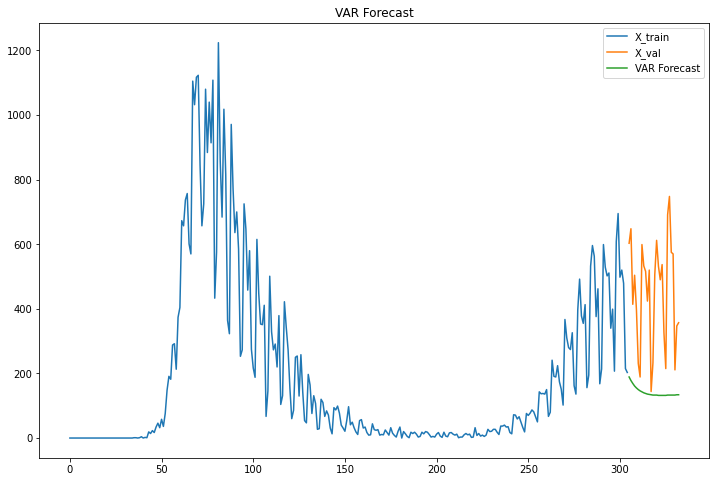

In [415]:
plt.figure(figsize=(12,8)) 
plt.plot(X_train.index, X_train['y'], label='X_train') 
plt.plot(X_val.index,X_val['y'], label='X_val') 
plt.plot(X_val.index,y_pred, label='VAR Forecast') 
plt.legend(loc='best') 
plt.title("VAR Forecast") 
plt.show()

In [416]:
# RMSE value for Moving Average 
rms = sqrt(mean_squared_error(X_val.y, y_pred)) 
print(rms)

349.7892222467696


Vector Moving Average

In [417]:
from statsmodels.tsa.statespace.varmax import VARMAX

model = VARMAX(X_train, order=(0,1))
model_fit = model.fit(disp=False)
yhat = model_fit.forecast(steps=len(X_val))
yhat = yhat.astype(int)
yhat

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/varmax.py:379: UserWarning:

Non-stationary starting moving-average parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



,index,add1,y
305,53639,9080,367
306,53590,5356,191
307,53590,5356,191
308,53590,5356,191
309,53590,5356,191
310,53590,5356,191
311,53590,5356,191
312,53590,5356,191
313,53590,5356,191
314,53590,5356,191


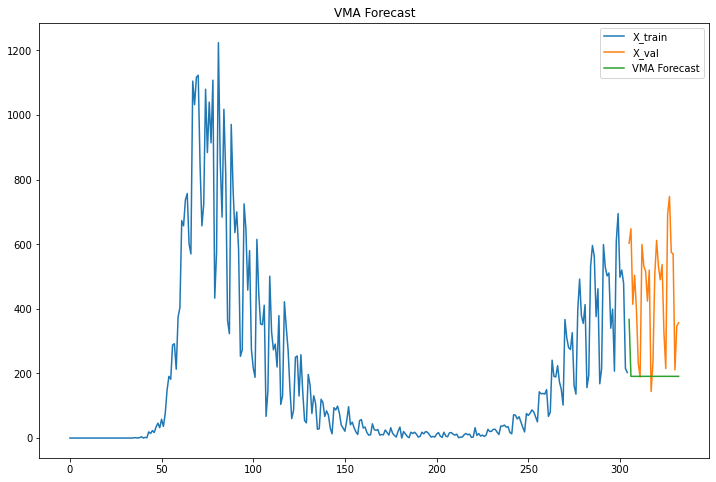

In [418]:
plt.figure(figsize=(12,8)) 
plt.plot(X_train.index, X_train['y'], label='X_train') 
plt.plot(X_val.index,X_val['y'], label='X_val') 
plt.plot(X_val.index,yhat.y, label='VMA Forecast') 
plt.legend(loc='best') 
plt.title("VMA Forecast") 
plt.show()

In [419]:
# RMSE value for Moving Average 
rms = sqrt(mean_squared_error(X_val.y, yhat.y)) 
print(rms)

300.95929957387926


Vector Autoregression Moving-Average (VARMA)

In [420]:
from statsmodels.tsa.statespace.varmax import VARMAX

# fit model
model = VARMAX(X_train, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.forecast(steps=len(X_val))
yhat = yhat.astype(int)
print(yhat)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning:

Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/varmax.py:379: UserWarning:

Non-stationary starting moving-average parameters found. Using zeros as starting parameters.



     index   add1    y
305  53741  12552  189
306  53741  12665  177
307  53741  12770  168
308  53741  12866  160
309  53741  12954  154
310  53741  13036  149
311  53741  13112  145
312  53741  13183  142
313  53741  13249  139
314  53741  13311  138
315  53741  13369  136
316  53741  13424  135
317  53741  13475  135
318  53741  13524  134
319  53741  13570  134
320  53741  13613  134
321  53741  13654  134
322  53741  13693  135
323  53741  13730  135
324  53741  13765  136
325  53741  13798  136
326  53741  13829  137
327  53741  13859  137
328  53741  13888  138
329  53741  13915  138
330  53741  13941  139
331  53741  13966  140
332  53741  13989  140


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning:

Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.



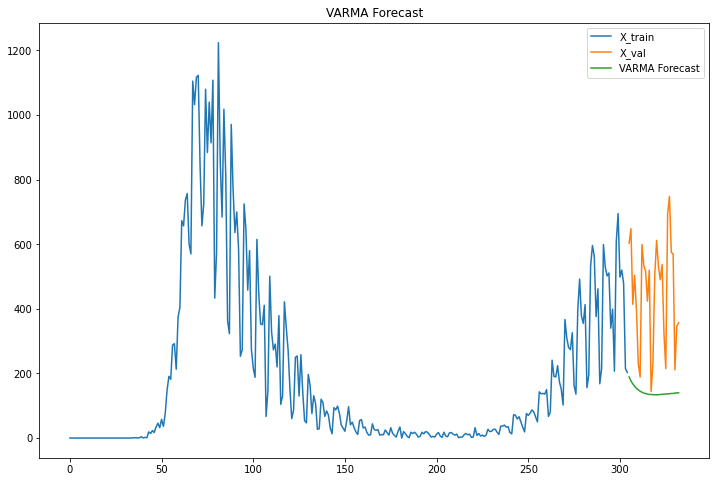

In [421]:
plt.figure(figsize=(12,8)) 
plt.plot(X_train.index, X_train['y'], label='X_train') 
plt.plot(X_val.index,X_val['y'], label='X_val') 
plt.plot(X_val.index,yhat.y, label='VARMA Forecast') 
plt.legend(loc='best') 
plt.title("VARMA Forecast") 
plt.show()

In [422]:
# RMSE value for Moving Average 
rms = sqrt(mean_squared_error(X_val.y, yhat.y)) 
print(rms)

348.26160118098414
